# Analysis

In [1]:
from datascience import * 
import numpy as np
from DataCleaning import *
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import *

In [2]:
data = Table.read_table('cleaned_data.csv')
data

C:\Anaconda3\lib\site-packages\datascience\tables.py:132: FutureWarning: read_table is deprecated, use read_csv instead.
  df = pandas.read_table(filepath_or_buffer, *args, **vargs)


Q5,Q7,Q8,Q9,Q15,Q16,Q17,Q20,Q23,Q23_5_TEXT,Q29_1,Q31,Q55,Q35,Q36,Q40_1,Q40_2,Q40_3,Q41_23,Q42_1,Q42_2,Q42_3,Q43_1,Q43_2,Q43_3,Q43_4,Q43_5,Q43_6,Q43_7,Q43_8,Q43_9,Q43_10,Q43_11,Q43_11_TEXT,Q44_0_GROUP,Q44_0_1_RANK,Q44_0_15_RANK,Q44_0_4_RANK,Q44_0_5_RANK,Q44_0_6_RANK,Q44_0_9_RANK,Q44_0_10_RANK,Q44_0_11_RANK,Q44_0_12_RANK,Q44_0_13_RANK,Q44_0_14_RANK,Q44_0_16_RANK,Q44_0_8_RANK,Q44_8_TEXT,Q47_1,Q47_2
Social Sciences,Woman,White,21,Yes,Polling station,Trump,Happy,Volunteering,nan,nan,No; I did not check,Mostly Republicans,Yes,No,1,1,1,7,2,6,6,5,5,5,5,5,5,5,5,5,5,0,nan,"Fox News,New York Times,CBS,Twitter,CNN",nan,4,2,5,1,nan,3,nan,nan,nan,nan,nan,nan,nan,Moderately knowledgeable,Slightly knowledgeable
Engineering/Computer Science,Man,White,20,Yes,Polling station,Trump,nan,Volunteering,nan,3,No; I do not know how,Mostly Republicans,No,No,4,2,2,7,3,4,1,5,4,4,4,3,3,4,3,3,3,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Slightly knowledgeable,Very knowledgeable
Social Sciences,Woman,Mixed Race,18,nan,nan,nan,"Sad,Scared,Angry",Community engagement,nan,nan,Yes; it was counted,Only Democrats,Yes,No,5,5,4,2,6,6,3,5,5,5,4,4,5,5,4,4,4,0,nan,"CNN,New York Times,Twitter,Facebook,Washington Post",4,3,2,1,nan,5,nan,nan,nan,nan,nan,nan,nan,nan,Extremely knowledgeable,Extremely knowledgeable
Life Sciences,Man,Mexican American/Chicanx,20,No,I do not remember,Clinton,Sad,Volunteering,nan,nan,nan,nan,No,No,4,4,4,4,4,6,2,5,5,5,5,5,5,5,5,5,5,5,nan,"Twitter,CNN,Facebook,VICE,Time",3,1,nan,2,nan,nan,nan,nan,4,nan,5,nan,nan,nan,Very knowledgeable,Very knowledgeable
Arts & Humanities,Woman,Mixed Race,19,nan,nan,nan,Scared,Community engagement,nan,1,No; I do not know how,Mostly Democrats,Yes,No,4,5,5,3,5,4,4,5,5,5,5,3,5,5,5,5,5,0,nan,"Facebook,Other,Washington Post,New York Times,Time",1,nan,4,nan,nan,3,nan,nan,nan,nan,5,nan,2,Snapchat,Very knowledgeable,Very knowledgeable
Arts & Humanities,Man,Mexican American/Chicanx,20,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Voting,nan,nan,Yes; it was counted,Only Democrats,No,No,1,1,1,1,5,4,1,5,5,5,5,5,5,5,5,5,5,1,nan,"Twitter,Facebook,CNN,Fox News,New York Times",2,1,5,3,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,Very knowledgeable,Moderately knowledgeable
Social Sciences,Woman,White,21,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Community engagement,nan,1,Yes; it was counted,Only Democrats,Yes,No,4,4,2,2,6,6,1,5,5,5,5,3,5,5,5,5,5,0,nan,"CNN,NPR,New York Times,Facebook,Washington Post",4,nan,3,1,nan,5,nan,nan,nan,2,nan,nan,nan,nan,Moderately knowledgeable,Very knowledgeable
Arts & Humanities,Man,Other Hispanic/Latinx,25+,Yes,Polling station,3rd party,Angry,Community engagement,nan,2,Yes; it was counted,Only Democrats,I do not remember,No,5,2,1,4,2,2,1,5,5,5,5,4,4,4,4,4,4,1,nan,"Twitter,Washington Post,Other",nan,1,nan,nan,nan,2,nan,nan,nan,nan,nan,nan,3,Business insider,Slightly knowledgeable,Moderately knowledgeable
Engineering/Computer Science,Man,White,21,nan,nan,nan,Other,Other,Strategic spending and manipulation.,nan,nan,nan,No,Yes,3,1,1,5,5,5,1,5,4,4,5,5,5,5,3,4,3,0,nan,"New York Times,CNN,Washington Post,NPR,Fox News",nan,nan,1,2,5,3,nan,nan,nan,4,nan,nan,nan,nan,Slightly knowledgeable,Slightly knowledgeable
Arts & Humanities,Woman,Other,20,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Voting,nan,3,No; I do not know how,Mostly Democrats,I do not remember,No,4,4,2,5,5,5,2,5,4,4,5,5,4,5,5,2,2,5,Education,"Facebook,New York Times,CNN,Washington Post",1,nan,2,3,nan,4,nan,nan,nan,nan,nan,nan,nan,nan,Moderately knowledgeable,Moderately knowledgeable


So far, we have cleaned the dataset. However, if we look through our dataset, we still have a considerable amount of missing values remaining. We will need to deal with those as we conduct our analysis. 

## To what extent does your major affect your voting behavior?
### Q5 Major vs. Q16 How did you vote  

In [3]:
missing_proportion(data, 'Q5')

0.0

Everyone entered their major, we have all the data

In [4]:
missing_proportion(data, 'Q16')

0.52

Wow that's a lot of missing values. Let's take a look at the data to see what's going on. Use .select to look at the relevant column

In [5]:
data.select('Q16')

Q16
Polling station
Polling station
None
I do not remember
None
Absentee / mail ballot
Absentee / mail ballot
Polling station
None
Absentee / mail ballot


We see a lot of None responses. To conduct our analysis, let's filter out those missing values. Use the drop_missing_rows function to do that. Save the result into a new table which we can use for analysis.

In [6]:
filtered = drop_missing_rows(data.select(['Q5', 'Q16']), "Q16") #drop the rows with missing values 
filtered = filtered.where('Q16', are.not_containing('I do not remember')) #
filtered = fix_major_formatting(filtered, 'Q5')
filtered.show(5)

Q5,Q16
Social Sciences,Polling station
Engineering,Polling station
Arts & Humanities,Absentee / mail ballot
Social Sciences,Absentee / mail ballot
Arts & Humanities,Polling station


Let's first convert these counts to proportions since the frequencies aren't the same in each category. 

In [7]:
pivot = filtered.pivot('Q5', 'Q16')
pivot
tbl = counts_to_proportions(pivot)
tbl

Q16,Arts & Humanities,Business,Engineering,Life Sciences,Physical Sciences,Social Sciences
Absentee / mail ballot,0.585366,0.2,0.632653,0.638298,0.8,0.611111
Polling station,0.365854,0.8,0.367347,0.340426,0.133333,0.361111
Provisional ballot,0.0487805,0,0,0.0212766,0.0666667,0.0277778


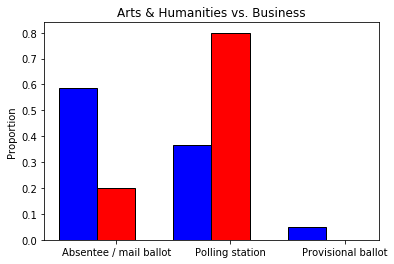

In [8]:
compare_bar_graphs(tbl, "Arts & Humanities", 'Business')

Now, we can do some plotting to infer if there are any trends. 

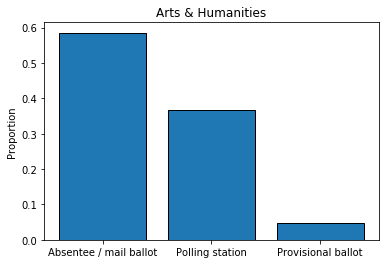

In [9]:
plot_bar_graph(tbl, 'Arts & Humanities')

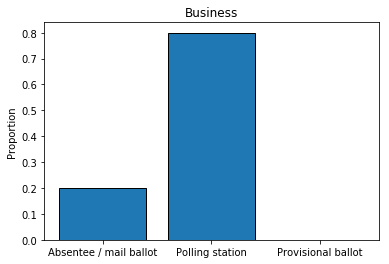

In [10]:
plot_bar_graph(tbl, 'Business')

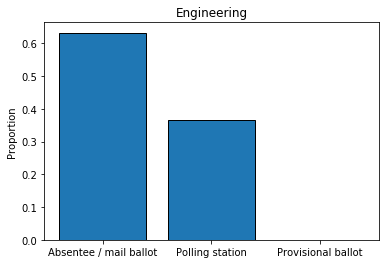

In [11]:
plot_bar_graph(tbl, 'Engineering')

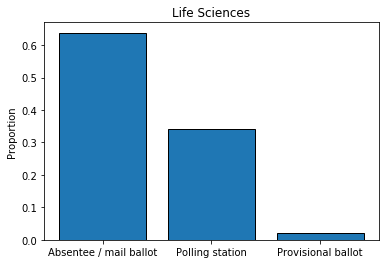

In [12]:
plot_bar_graph(tbl, 'Life Sciences')

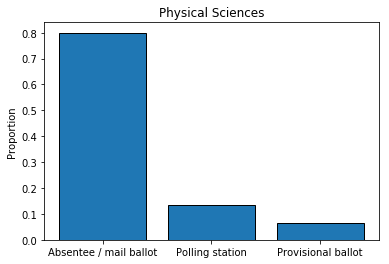

In [13]:
plot_bar_graph(tbl, 'Physical Sciences')

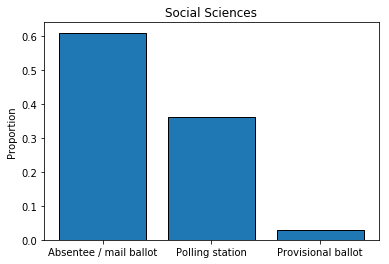

In [14]:
plot_bar_graph(tbl, 'Social Sciences')

Looks like there is a clear preference for absentee ballots. This is to be expected for our sample population: students. One outlier is the Business students. 

### Q5 Major vs. Q17 Who did you vote for

Now that we've got the basics down, we will create a function that allows us to repeat this process of data transformation. Let's replicate the steps above to create a table of proportions which allows us to create bar graphs to compare multiple categorical variables. 

In [15]:
def categorical_pipeline(question1, question2):
    filtered = drop_missing_rows(data.select([question1, question2]), question2)
    filtered = fix_major_formatting(filtered, question1)
    pivot = filtered.pivot(question1, question2)
    proportion_table = counts_to_proportions(pivot)
    return proportion_table

votes = categorical_pipeline('Q5', 'Q17')
votes 

Q17,Arts & Humanities,Business,Engineering,Life Sciences,Physical Sciences,Social Sciences
3rd party,0.142857,0.2,0.0851064,0.102041,0.0666667,0.0657895
Clinton,0.809524,0.7,0.87234,0.897959,0.933333,0.894737
Trump,0.047619,0.1,0.0425532,0,0,0.0394737


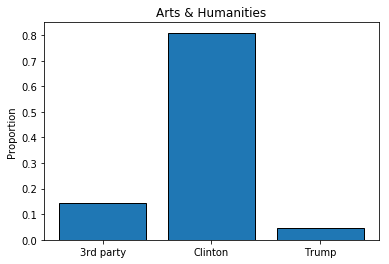

In [16]:
plot_bar_graph(votes, 'Arts & Humanities')

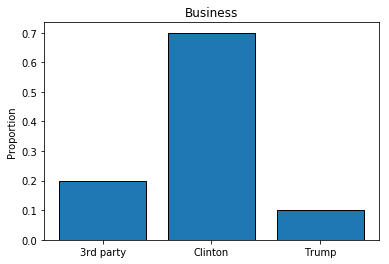

In [17]:
plot_bar_graph(votes, 'Business')

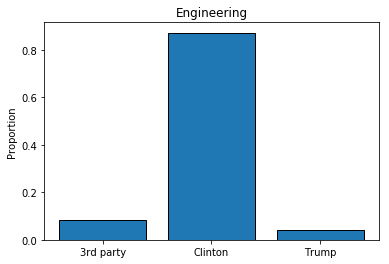

In [18]:
plot_bar_graph(votes, 'Engineering')

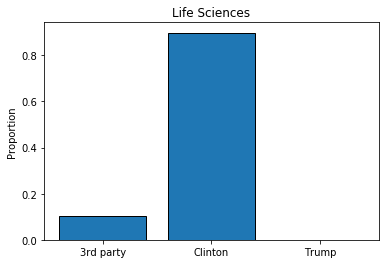

In [19]:
plot_bar_graph(votes, 'Life Sciences')

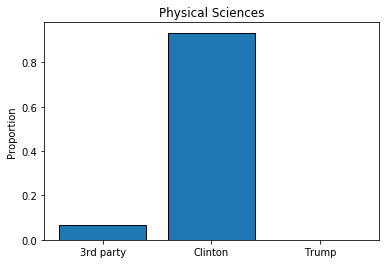

In [20]:
plot_bar_graph(votes, 'Physical Sciences')

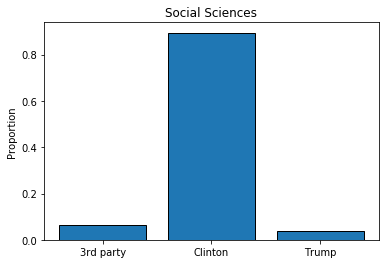

In [21]:
plot_bar_graph(votes, 'Social Sciences')

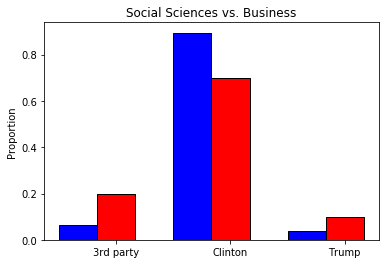

In [22]:
compare_bar_graphs(votes, "Social Sciences", 'Business')

In [23]:
data

Q5,Q7,Q8,Q9,Q15,Q16,Q17,Q20,Q23,Q23_5_TEXT,Q29_1,Q31,Q55,Q35,Q36,Q40_1,Q40_2,Q40_3,Q41_23,Q42_1,Q42_2,Q42_3,Q43_1,Q43_2,Q43_3,Q43_4,Q43_5,Q43_6,Q43_7,Q43_8,Q43_9,Q43_10,Q43_11,Q43_11_TEXT,Q44_0_GROUP,Q44_0_1_RANK,Q44_0_15_RANK,Q44_0_4_RANK,Q44_0_5_RANK,Q44_0_6_RANK,Q44_0_9_RANK,Q44_0_10_RANK,Q44_0_11_RANK,Q44_0_12_RANK,Q44_0_13_RANK,Q44_0_14_RANK,Q44_0_16_RANK,Q44_0_8_RANK,Q44_8_TEXT,Q47_1,Q47_2
Social Sciences,Woman,White,21,Yes,Polling station,Trump,Happy,Volunteering,nan,nan,No; I did not check,Mostly Republicans,Yes,No,1,1,1,7,2,6,6,5,5,5,5,5,5,5,5,5,5,0,nan,"Fox News,New York Times,CBS,Twitter,CNN",nan,4,2,5,1,nan,3,nan,nan,nan,nan,nan,nan,nan,Moderately knowledgeable,Slightly knowledgeable
Engineering/Computer Science,Man,White,20,Yes,Polling station,Trump,nan,Volunteering,nan,3,No; I do not know how,Mostly Republicans,No,No,4,2,2,7,3,4,1,5,4,4,4,3,3,4,3,3,3,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Slightly knowledgeable,Very knowledgeable
Social Sciences,Woman,Mixed Race,18,nan,None,nan,"Sad,Scared,Angry",Community engagement,nan,nan,Yes; it was counted,Only Democrats,Yes,No,5,5,4,2,6,6,3,5,5,5,4,4,5,5,4,4,4,0,nan,"CNN,New York Times,Twitter,Facebook,Washington Post",4,3,2,1,nan,5,nan,nan,nan,nan,nan,nan,nan,nan,Extremely knowledgeable,Extremely knowledgeable
Life Sciences,Man,Mexican American/Chicanx,20,No,I do not remember,Clinton,Sad,Volunteering,nan,nan,nan,nan,No,No,4,4,4,4,4,6,2,5,5,5,5,5,5,5,5,5,5,5,nan,"Twitter,CNN,Facebook,VICE,Time",3,1,nan,2,nan,nan,nan,nan,4,nan,5,nan,nan,nan,Very knowledgeable,Very knowledgeable
Arts & Humanities,Woman,Mixed Race,19,nan,None,nan,Scared,Community engagement,nan,1,No; I do not know how,Mostly Democrats,Yes,No,4,5,5,3,5,4,4,5,5,5,5,3,5,5,5,5,5,0,nan,"Facebook,Other,Washington Post,New York Times,Time",1,nan,4,nan,nan,3,nan,nan,nan,nan,5,nan,2,Snapchat,Very knowledgeable,Very knowledgeable
Arts & Humanities,Man,Mexican American/Chicanx,20,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Voting,nan,nan,Yes; it was counted,Only Democrats,No,No,1,1,1,1,5,4,1,5,5,5,5,5,5,5,5,5,5,1,nan,"Twitter,Facebook,CNN,Fox News,New York Times",2,1,5,3,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,Very knowledgeable,Moderately knowledgeable
Social Sciences,Woman,White,21,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Community engagement,nan,1,Yes; it was counted,Only Democrats,Yes,No,4,4,2,2,6,6,1,5,5,5,5,3,5,5,5,5,5,0,nan,"CNN,NPR,New York Times,Facebook,Washington Post",4,nan,3,1,nan,5,nan,nan,nan,2,nan,nan,nan,nan,Moderately knowledgeable,Very knowledgeable
Arts & Humanities,Man,Other Hispanic/Latinx,25+,Yes,Polling station,3rd party,Angry,Community engagement,nan,2,Yes; it was counted,Only Democrats,I do not remember,No,5,2,1,4,2,2,1,5,5,5,5,4,4,4,4,4,4,1,nan,"Twitter,Washington Post,Other",nan,1,nan,nan,nan,2,nan,nan,nan,nan,nan,nan,3,Business insider,Slightly knowledgeable,Moderately knowledgeable
Engineering/Computer Science,Man,White,21,nan,None,nan,Other,Other,Strategic spending and manipulation.,nan,nan,nan,No,Yes,3,1,1,5,5,5,1,5,4,4,5,5,5,5,3,4,3,0,nan,"New York Times,CNN,Washington Post,NPR,Fox News",nan,nan,1,2,5,3,nan,nan,nan,4,nan,nan,nan,nan,Slightly knowledgeable,Slightly knowledgeable
Arts & Humanities,Woman,Other,20,Yes,Absentee / mail ballot,Clinton,"Sad,Scared,Angry",Voting,nan,3,No; I do not know how,Mostly Democrats,I do not remember,No,4,4,2,5,5,5,2,5,4,4,5,5,4,5,5,2,2,5,Education,"Facebook,New York Times,CNN,Washington Post",1,nan,2,3,nan,4,nan,nan,nan,nan,nan,nan,nan,nan,Moderately knowledgeable,Moderately knowledgeable


## Analysis of Text
### Wordclouds

In surveys, it's common to ask for written responses to questions. One way we can analyze these responses is to create word clouds, or data visualizations which show the most frequent words which appear in text as bigger and less frequent words as smaller. 

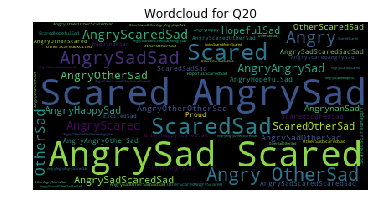

In [24]:
create_wordcloud(data, 'Q20')